In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

x=df[['sepal_length','sepal_width']]
y=df['petal_width']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)
model =LinearRegression()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)

In [8]:
print('Intercept:',model.intercept_)
print('slope:',model.coef_)

Intercept: -1.6023954997718297
slope: [ 0.73975995 -0.49661881]


In [12]:
model.predict([[5.1,3.5]])

C:\Users\91620\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.43221437])

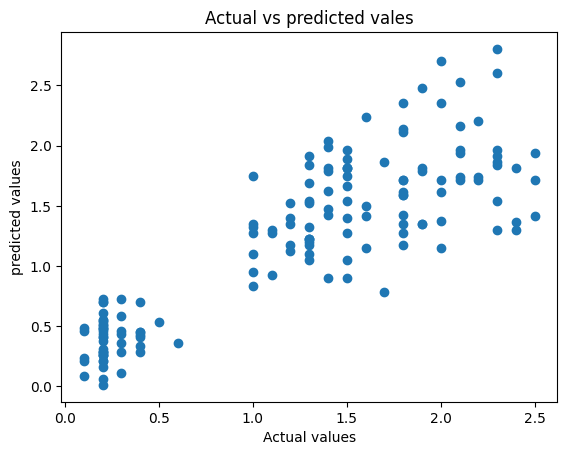

In [13]:
plt.scatter(y,model.predict(x))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Actual vs predicted vales')
plt.show()

In [14]:
#printing the metrics for evaluating the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('R2 Score:', r2_score(y_test,y_pred))#
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean square error:',mean_squared_error(y_test,y_pred))

R2 Score: 0.63370873990535
Mean absolute error: 0.2909112060676507
Mean square error: 0.1758564339714414


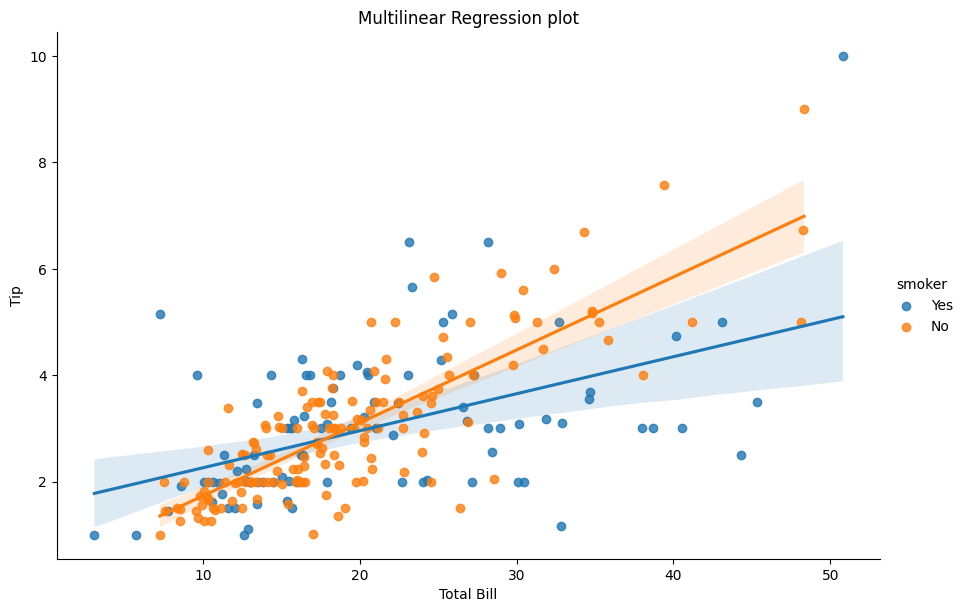

In [15]:
import seaborn as sns

data = sns.load_dataset('tips')#dataset
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=data,height=6,aspect=1.5)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Multilinear Regression plot')
plt.show()

In [18]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
data = sns.load_dataset('tips')

x=data[['total_bill','size','smoker']]
y=data['tip']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

model=LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('R2 Score:', r2_score(y_test,y_pred))#
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean square error:',mean_squared_error(y_test,y_pred))

sns.lmplot(x='total bill',y='tip',hue='smoker',data=data,height=6,aspect=1.5,markers=['o','x'])

ValueError: could not convert string to float: 'No'

In [41]:
data = sns.load_dataset('tips')

data['smoker_bin']= data['smoker'].apply(lambda x: 1 if x=='Yes'else 0)
data.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [42]:
x = data[['total_bill', 'size', 'smoker_bin']]
y = data['tip']

Columns in DataFrame: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'smoker_bin'],
      dtype='object')
R2 Score: 0.4507089585036145
Mean absolute error: 0.6674162144694377
Mean square error: 0.6865980620855362


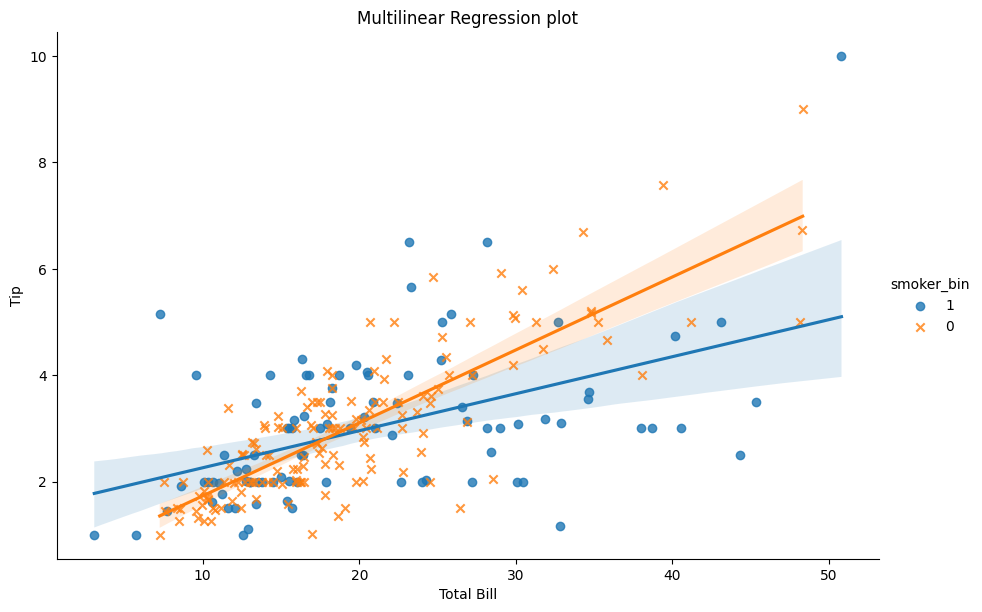

In [45]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = sns.load_dataset('tips')

# Create 'smoker_bin' column
data['smoker_bin'] = data['smoker'].map({'Yes': 1, 'No': 0})

# Print the columns of the DataFrame
print("Columns in DataFrame:", data.columns)

# Selecting columns for x and y
try:
    x = data[['total_bill', 'size', 'smoker_bin']]
    y = data['tip']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print('R2 Score:', r2_score(y_test, y_pred))
    print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
    print('Mean square error:', mean_squared_error(y_test, y_pred))

    sns.lmplot(x='total_bill', y='tip', hue='smoker_bin', data=data, height=6, aspect=1.5, markers=['o', 'x'])

    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.title('Multilinear Regression plot')
    plt.show()
except KeyError as e:
    print("KeyError:", e)


In [46]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [47]:
data.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [49]:
data = sns.load_dataset('tips')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['day_encoded']=le.fit_transform(data['day'])

print(data['day_encoded'].unique)

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day_encoded, Length: 244, dtype: int64>


In [52]:
x=data[['total_bill','size','day_encoded']]
y=data['tip']

KeyError: "['day_encoded'] not in index"

Columns in DataFrame: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'smoker_bin', 'day_Fri', 'day_Sat', 'day_Sun'],
      dtype='object')
R2 Score: 0.46752976130485235
Mean absolute error: 0.6591957722968487
Mean square error: 0.6655725405795043


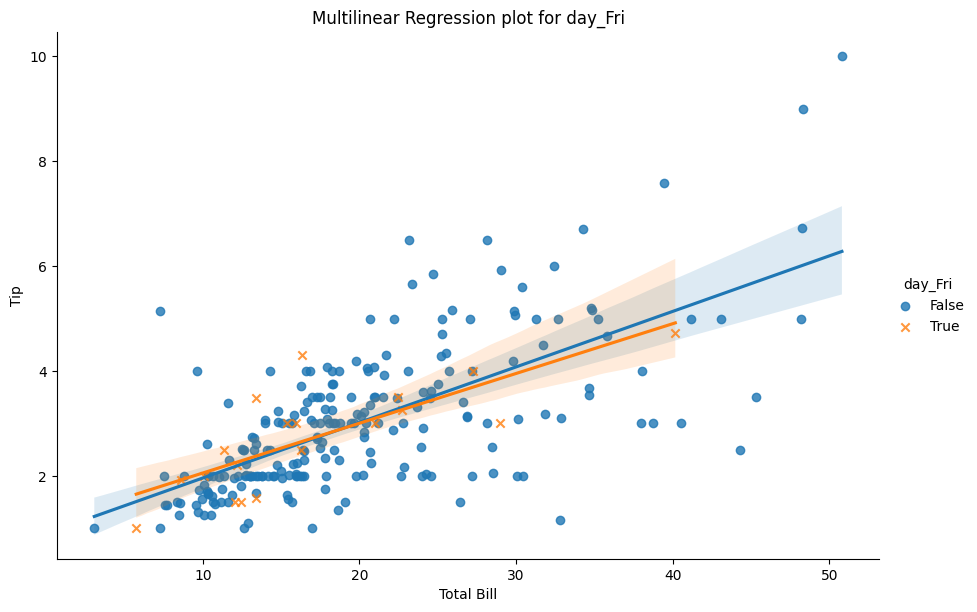

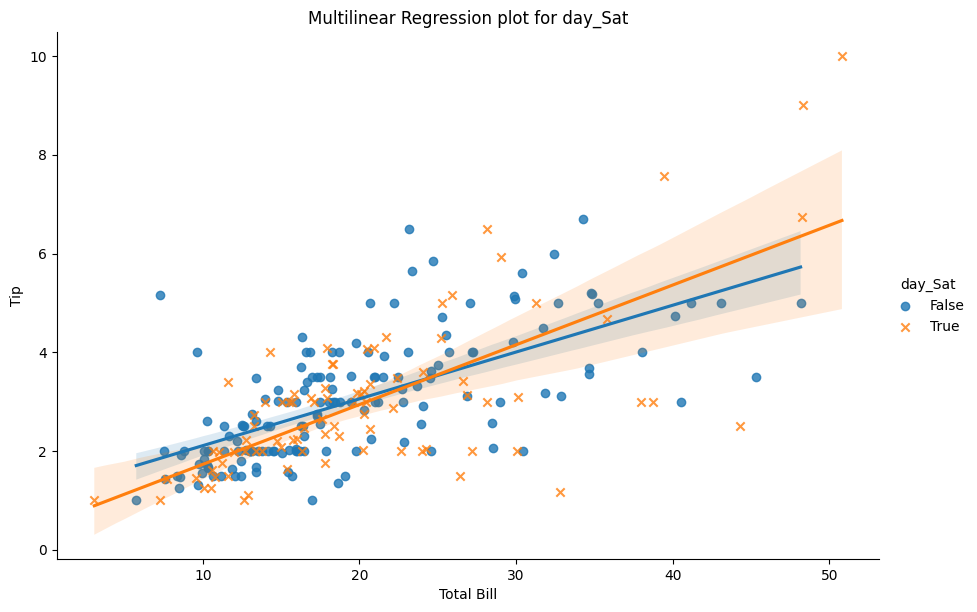

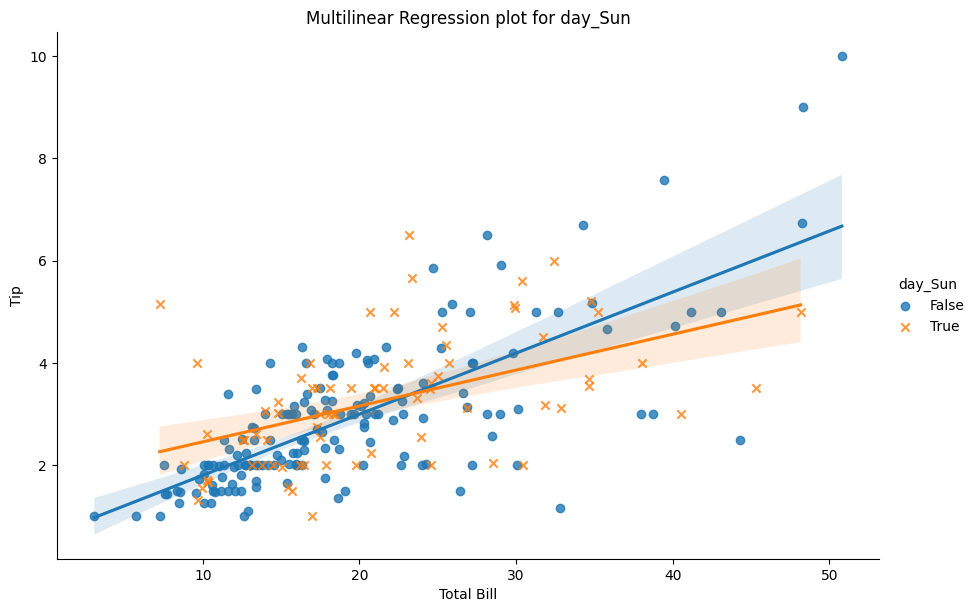

In [53]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = sns.load_dataset('tips')

# Create 'smoker_bin' column
data['smoker_bin'] = data['smoker'].map({'Yes': 1, 'No': 0})

# One-hot encode the 'day' column
day_dummies = pd.get_dummies(data['day'], prefix='day', drop_first=True)
data = pd.concat([data, day_dummies], axis=1)

# Print the columns of the DataFrame
print("Columns in DataFrame:", data.columns)

# Selecting columns for x and y
try:
    # Note: day_dummies.columns is a list of all new dummy variable column names
    x = data[['total_bill', 'size'] + list(day_dummies.columns)]
    y = data['tip']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print('R2 Score:', r2_score(y_test, y_pred))
    print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
    print('Mean square error:', mean_squared_error(y_test, y_pred))

    # As the hue in lmplot can only accept one column, we will plot total_bill vs tip with a different approach
    for day_col in day_dummies.columns:
        sns.lmplot(x='total_bill', y='tip', hue=day_col, data=data, height=6, aspect=1.5, markers=['o', 'x'])
        plt.xlabel('Total Bill')
        plt.ylabel('Tip')
        plt.title(f'Multilinear Regression plot for {day_col}')
        plt.show()
except KeyError as e:
    print("KeyError:", e)
